# 正则化回归分析：Boston房价预测

In [1]:
# 从sklearn.datasets导入波士顿房价数据读取器
from sklearn.datasets import load_boston

# 从读取房价数据存储在变量boston中
boston = load_boston()

# 输出数据描述
print boston.DESCR

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [2]:
#将数据分割训练数据与测试数据
from sklearn.cross_validation import train_test_split

import numpy as np

X = boston.data
y = boston.target

# 随机采样25%的数据构建测试样本，其余作为训练样本
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=33, test_size=0.25)

# 分析回归目标值的差异
print "The max target value is", np.max(boston.target)
print "The min target value is", np.min(boston.target)
print "The average target value is", np.mean(boston.target)

The max target value is 50.0
The min target value is 5.0
The average target value is 22.5328063241


/Applications/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
#发现各特征差异较大，需要进行数据标准化预处理
#标准化的目的在于避免原始特征值差异过大，导致训练得到的参数权重不一

In [4]:
# 数据标准化
from sklearn.preprocessing import StandardScaler

# 分别初始化对特征和目标值的标准化器
ss_X = StandardScaler()
ss_y = StandardScaler()

# 分别对训练和测试数据的特征以及目标值进行标准化处理
X_train = ss_X.fit_transform(X_train)
X_test = ss_X.transform(X_test)

y_train = ss_y.fit_transform(y_train)
y_test = ss_y.transform(y_test)

/Applications/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Applications/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Applications/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if yo

In [5]:
# 线性回归
from sklearn.linear_model import LinearRegression

# 使用默认配置初始化
lr = LinearRegression()

# 训练模型参数
lr.fit(X_train, y_train)

# 预测
lr_y_predict = lr.predict(X_test)

#显示特征的回归系数
lr.coef_

array([-0.11286566,  0.1306885 ,  0.01207992,  0.09054443, -0.17880511,
        0.31821979, -0.01744478, -0.33320158,  0.26716638, -0.21737875,
       -0.20384674,  0.05662515, -0.40794066])

In [47]:
#岭回归
from sklearn.linear_model import  RidgeCV, LassoCV
import matplotlib.pyplot as plt

alphas = [0.01, 0.1, 1, 10,20, 30, 50, 60, 80,100]
reg = RidgeCV(alphas=alphas, store_cv_values=True)   
reg.fit(X_train, y_train)       


RidgeCV(alphas=[0.01, 0.1, 1, 10, 20, 30, 50, 60, 80, 100], cv=None,
    fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
    store_cv_values=True)

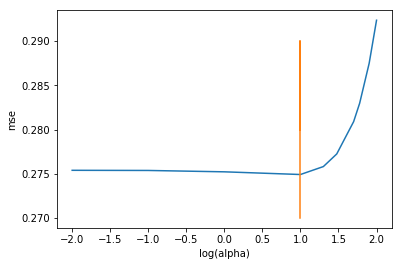

('alpha is:', 10.0)


array([-0.10354081,  0.11293307, -0.01049108,  0.09295071, -0.15094031,
        0.32557661, -0.02033021, -0.2991313 ,  0.20061662, -0.15572242,
       -0.19759762,  0.05583187, -0.39404276])

In [51]:
mses = np.mean(reg.cv_values_, axis = 0)
plt.plot(np.log10(alphas), mses) 
plt.plot(np.log10(reg.alpha_)*np.ones(3), [0.27, 0.29, 0.28])
plt.xlabel('log(alpha)')
plt.ylabel('mse')
plt.show()
            
print ('alpha is:', reg.alpha_)
reg.coef_

In [49]:
#Lasso
#alphas = [0.0001, 0.001, 0.01, 0.10, 0.1, 1, 10,100]
lasso = LassoCV()   
lasso.fit(X_train, y_train)       

LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

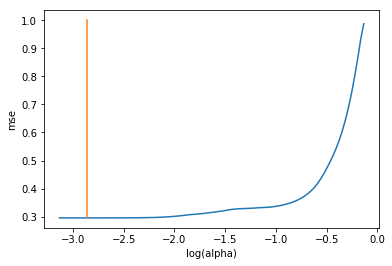

('alpha is:', 0.0013755996743502817)


array([-0.10899851,  0.12503028,  0.        ,  0.09062291, -0.17024785,
        0.31932759, -0.0148521 , -0.32493279,  0.24450873, -0.19486461,
       -0.20154943,  0.05493077, -0.40813897])

In [50]:
mses = np.mean(lasso.mse_path_, axis = 1)
plt.plot(np.log10(lasso.alphas_), mses) 
plt.plot(np.log10(lasso.alpha_)*np.ones(3), [0.3, 0.4, 1.0])
plt.xlabel('log(alpha)')
plt.ylabel('mse')
plt.show()    
            
print ('alpha is:', lasso.alpha_)
lasso.coef_            

In [30]:
# 使用LinearRegression模型自带的评估模块（r2_score），并输出评估结果
print 'The value of default measurement of LinearRegression is', lr.score(X_test, y_test)

# 使用RidgeCV模型自带的评估模块，并输出评估结果
print 'The value of default measurement of RidgeCV is', reg.score(X_test, y_test)

# 使用LassoCV模型自带的评估模块，并输出评估结果
print 'The value of default measurement of LassoCV is', lasso.score(X_test, y_test)

The value of default measurement of LinearRegression is 0.6763403831
The value of default measurement of RidgeCV is 0.67691092236
The value of default measurement of LassoCV is 0.676345391996
